
O Crédito Imobiliário no Brasil cresceu consideravelmente nos últimos 2 anos, pela primeira vez desde a crise de 2015. Esse fato se deu por 3 fatores principais: Selic, crescimento da confiança do consumidor e a boa qualidade de crédito (que deu segurança para os bancos diversificarem sua carteira).

A Selic, por ser a taxa básica de juros da economia, mexe com todas as outras taxas do mercado, inclusive com a taxa de juros de financiamento imobiliário. E, quando o assunto é crédito imobiliário, as variações da Selic podem ser uma ponte entre a casa própria e a inadimplência.

Nesse sentido, o artigo abordará a Selic como um dos principais influenciadores para a movimentação do crédito durante a Pandemia do Covid-19. Portanto, realizaremos um estudo temporal sobre o comportamento das principais variáveis que acompanham o crédito imobiliário, utilizando a Linguagem de Programação Python para plotar gráficos, criar funções e importar dados. Assim, será possível apresentar ao leitor o comportamento do mercado de crédito imobiliário de forma visual. 


# Definição


Crédito imobiliário, sendo também chamado de financiamento imobiliário, é uma modalidade de crédito oferecida por instituições financeiras para a compra, construção ou reforma de imóveis, sejam eles residenciais ou comerciais. Segundo o IPEA (Instituto de Pesquisa Econômica Aplicada), entre 2003 e 2018, o mercado de crédito imobiliário cresceu de 1,5% para quase 10% do produto interno bruto (PIB), sendo hoje uma das principais modalidades de crédito na carteira dos grandes bancos brasileiros. 



Antes de introduzirmos o assunto vale pontuar que analisaremos somente o crédito imobiliário para pessoa física, já que ele é majoritário entre o crédito residencial e comercial. Segundo o Banco Central, apenas 2% do crédito imobiliário é destinado ao comercial, e 98% para crédito residencial. Por isso, em nossa análise, focaremos no crédito para as famílias.


# Extração dos dados


Para realizar o estudo, extraímos os dados do Sistema Gerenciador de Séries Temporais (SGS)  do Banco Central do Brasil através da biblioteca pandas, o que possibilita o acesso e a visualização dos dados diretamente na interface do Python. Esses dados estão disponíveis no seguinte link (https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries) e são organizados através de códigos, os quais utilizaremos para importar a database para o Python.


# Importando Selic e Financiamento Imobiliário total do Banco Central

In [23]:
#11	Taxa de juros - Selic

import pandas as pd

selic_import = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json'
selic = pd.read_json(selic_import)

#Dados diários para Selic a partir de 1986
display(selic)


,data,valor
0,04/06/1986,0.065041
1,05/06/1986,0.067397
2,06/06/1986,0.066740
3,09/06/1986,0.068247
4,10/06/1986,0.067041
...,...,...
8989,14/04/2022,0.043739
8990,18/04/2022,0.043739
8991,19/04/2022,0.043739
8992,20/04/2022,0.043739



Como é possível verificar abaixo, a extração foi feita de maneira simples e eficiente, sendo possível observar todos os dados de Selic de 1986 até a sua última atualização.


In [24]:
#21387	Pesquisa Trimestral de Condições de Crédito - Crédito habitacional - Demanda observada

demanda_observada_import  = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.21387/dados?formato=json'
demanda_observada = pd.read_json(demanda_observada_import)

#Dados diários para Crédito imobiliário a partir de 2011
display(demanda_observada)

,data,valor
0,01/01/2011,1.00
1,01/04/2011,0.75
2,01/07/2011,0.38
3,01/10/2011,0.75
4,01/01/2012,0.50
5,01/04/2012,0.38
6,01/07/2012,0.25
7,01/10/2012,0.25
8,01/01/2013,0.38
9,01/04/2013,0.25


# Analisando a última década


Como foi mencionado anteriormente quando observamos os dados para Selic, cada variável extraída do SGS possui uma data específica de início e último valor disponível, portanto, é necessário padronizá-las para um intervalo de tempo específico para plotar nos gráficos, caso contrário, teríamos erros do tipo  “'x and y must have same first dimension, but have shapes (2831,) and (131,)'. 

Para tanto, importamos a biblioteca Datetime (utilizada para manipular datas e horas) e filtramos pelo período que desejamos analisar. Abaixo, é possível observar um exemplo do que foi feito com uma das diversas variáveis que utilizamos em nosso artigo (onde buscávamos filtrar selic para o período de 2011-2022).


In [25]:
#import datetime e filtre o período que deseja analisar

#definindo selic
import datetime

selic_datas = selic['data']
selic_valores = selic['valor']

selic_per_data = pd.DataFrame({'Joined_date': pd.to_datetime(selic_datas, format = '%d/%m/%Y'),"valor":selic_valores})

selic_decada = selic_per_data.query("Joined_date >= '2011-01-1' and Joined_date <='2022-04-08'")

#Selic padronizada para 2010-2022
display(selic_decada)


#definindo credito imobiliario

demanda_datas = demanda_observada['data']
demanda_valores = demanda_observada['valor']

demanda_per_data = pd.DataFrame({'Joined_date': pd.to_datetime(demanda_datas, format = '%d/%m/%Y'),"valor":demanda_valores})

demanda_observada_decada = demanda_per_data.query("Joined_date >= '2011-01-1' and Joined_date <='2022-04-08'")

#Demanda por crédito imobiliário padronizado para 2011-2022
display(demanda_observada_decada)

,Joined_date,valor
6155,2011-01-03,0.040239
6156,2011-01-04,0.040203
6157,2011-01-05,0.040239
6158,2011-01-06,0.040203
6159,2011-01-07,0.040239
...,...,...
8981,2022-04-04,0.043739
8982,2022-04-05,0.043739
8983,2022-04-06,0.043739
8984,2022-04-07,0.043739


,Joined_date,valor
0,2011-01-01,1.00
1,2011-04-01,0.75
2,2011-07-01,0.38
3,2011-10-01,0.75
4,2012-01-01,0.50
5,2012-04-01,0.38
6,2012-07-01,0.25
7,2012-10-01,0.25
8,2013-01-01,0.38
9,2013-04-01,0.25


# Plotando um gráfico com dois eixos 


A partir disso, podemos começar a analisar e entender a relação entre Selic e Crédito Imobiliário. Assim, uma das formas mais visuais de compararmos duas variáveis é através de um gráfico. Com isso, importamos a biblioteca Matplotlib e iniciamos nossa análise.

A primeira relação que podemos observar é para Selic x Demanda por Crédito Imobiliário:


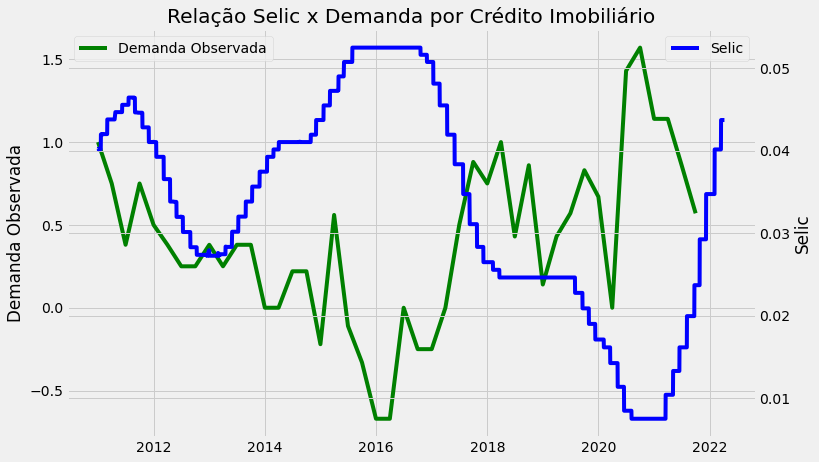

In [27]:
#importando Matplotlib
import matplotlib.pyplot as plt


#Definimos o tamanho do gráfico:
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')


fig, ax1 = plt.subplots()


#dando nome as variáveis x e y, através da nova base de dados que criamos
grafico_demanda_datas = demanda_observada_decada['Joined_date']
grafico_demanda_valores = demanda_observada_decada['valor']


#ax1
ax1.plot(grafico_demanda_datas , grafico_demanda_valores, color = 'g', label = 'Demanda Observada')
ax1.set_ylabel('Demanda Observada')
                                                         
ax2 = ax1.twinx() 
                                                         
                                                         
#dando nome as variáveis x e y, através da nova base de dados que criamos
grafico_selic_datas = selic_decada['Joined_date']
grafico_selic_valores = selic_decada['valor']

#ax2
ax2.plot(grafico_selic_datas, grafico_selic_valores, color = 'b', label = 'Selic')
ax2.set_ylabel('Selic')  
                                                
                                                                                        
#definindo título,
plt.title('Relação Selic x Demanda por Crédito Imobiliário')

ax1.legend(loc=0) 
ax2.legend(loc=0)

plt.show()



Como é possível verificar, a relação entre Selic e demanda por crédito imobiliário não é direta. Isso acontece porque a taxa de juros do financiamento imobiliário não sobe ou cai na mesma proporção da variação da Selic, se assim fosse, com o aumento da Selic, que foi da sua mínima histórica de 2% para 11,75%, o custo do crédito imobiliário subiria tanto que ficaria inviável para a maioria das famílias adquirir o crédito, ou até mesmo pagá-lo, gerando uma enorme inadimplência no setor. 

Entretanto, é possível sim afirmar que o aumento da Selic, ou a sua diminuição, afeta o crédito imobiliário, mas a velocidade que isso ocorre depende de outras variáveis do mercado. 


# Dois eixos


Você pode estar se perguntando "por que foram utilizados dois eixos diferentes no gráfico?"

Essa forma de exibição não tangencia nenhum tipo de variação que poderia estar sendo ocultada pela diferença de escala entre as variáveis e, portanto, garante que não foquemos na variação absoluta, mas sim nas variações relativas de uma para outra. 

Mas afinal, como podemos plotar um gráfico com dois eixos y distintos? Para isso, ao invés de “plt.plot” mudamos para “x1.plot” e “x2.plot”.


# Mas afinal, por que isso acontece?

In [12]:
#25499 - Taxa média mensal de juros - Pessoas físicas - Financiamento imobiliário total

import pandas as pd

taxa_mensal_credito_import = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.25499/dados?formato=json'
taxa_mensal_credito = pd.read_json(taxa_mensal_credito_import)

display(taxa_mensal_credito)

#Como já havíamos importado selic anteriormente poderíamos utilizar a mesma base de dados para relacionar Selic x Taxa de crédito mensal 

selic_taxas = selic_per_data.query("Joined_date >= '2011-03-11' and Joined_date <='2022-01-01'")
display(selic_decada)


,data,valor
0,01/03/2011,0.85
1,01/04/2011,0.80
2,01/05/2011,0.85
3,01/06/2011,0.81
4,01/07/2011,0.87
...,...,...
126,01/09/2021,0.58
127,01/10/2021,0.60
128,01/11/2021,0.63
129,01/12/2021,0.71


,Joined_date,valor
6155,2011-01-03,0.040239
6156,2011-01-04,0.040203
6157,2011-01-05,0.040239
6158,2011-01-06,0.040203
6159,2011-01-07,0.040239
...,...,...
8981,2022-04-04,0.043739
8982,2022-04-05,0.043739
8983,2022-04-06,0.043739
8984,2022-04-07,0.043739


In [13]:
#Importando 4390 Taxa de juros - Selic acumulada no mês

selic_mensal = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.4390/dados?formato=json'
selic_mensal = pd.read_json(selic_mensal)

#definindo Selic a partir de 2011

selic_mensal_datas = selic_mensal['data']
selic_mensal_valores = selic_mensal['valor']

selic_mensal_per_data = pd.DataFrame({'Joined_date': pd.to_datetime(selic_mensal_datas, format = '%d/%m/%Y'),"valor":selic_mensal_valores})

selic_mensal_filtered = selic_mensal_per_data.query("Joined_date >= '2011-03-1' and Joined_date <='2022-01-01'")
display(selic_mensal_filtered)

,Joined_date,valor
297,2011-03-01,0.92
298,2011-04-01,0.84
299,2011-05-01,0.99
300,2011-06-01,0.96
301,2011-07-01,0.97
...,...,...
423,2021-09-01,0.44
424,2021-10-01,0.49
425,2021-11-01,0.59
426,2021-12-01,0.77


# Portanto, a partir disso, como veremos a seguir, todas as taxas acompanham a Selic de alguma forma

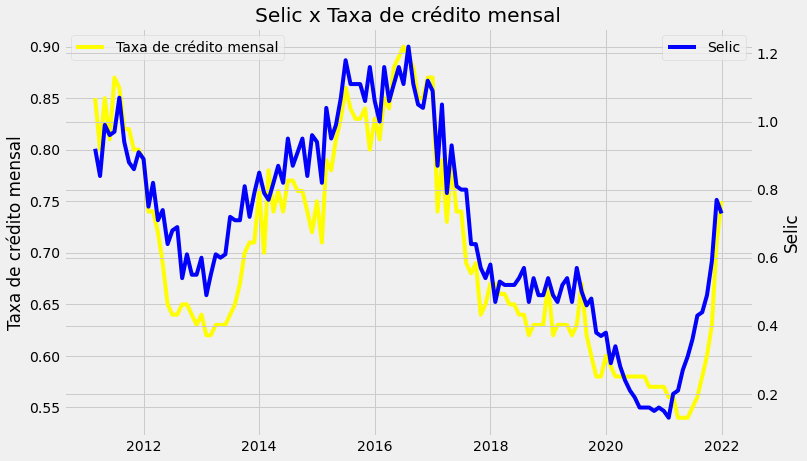

In [72]:
#Definimos o tamanho do gráfico:
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots()

#Definindo Selic
datas_selic_taxa = selic_mensal_filtered['Joined_date']
valores_selic_taxa = selic_mensal_filtered['valor']

#Definindo Taxa de juros mensal
taxa_mensal_valor = taxa_mensal_credito['valor']

ax1.plot(datas_selic_taxa, taxa_mensal_valor, color = 'yellow', label = 'Taxa de crédito mensal')
ax1.set_ylabel('Taxa de crédito mensal')  

ax2 = ax1.twinx() 

ax2.plot(datas_selic_taxa, valores_selic_taxa, color = 'blue', label = 'Selic')
ax2.set_ylabel('Selic')  

plt.title('Selic x Taxa de crédito mensal')

ax1.legend(loc=2) 
ax2.legend(loc=0)

plt.legend()
plt.show()


Analisando melhor a relação entre crédito imobiliário em reais, taxa de juros de crédito imobiliário e Selic para o período da pandemia 2019-2022, podemos fazer algumas observações:


In [35]:
#Filtrando as datas para 2020-2022
selic_2020 = selic_mensal_per_data.query("Joined_date >= '2019-01-01' and Joined_date <='2022-01-01'")

demanda_imobiliario_2020 = demanda_per_data.query("Joined_date >= '2019-01-01' and Joined_date <='2022-01-01'")

taxa_credito_datas_2020 = taxa_mensal_credito ['data']
taxa_credito_valor_2020 = taxa_mensal_credito ['valor']

taxa_credito_per_data = pd.DataFrame({'Joined_date': pd.to_datetime(taxa_credito_datas_2020, format = '%d/%m/%Y'),"valor":taxa_credito_valor_2020})

taxa_credito_2020 = taxa_credito_per_data.query("Joined_date >= '2019-01-01' and Joined_date <='2022-01-01'")


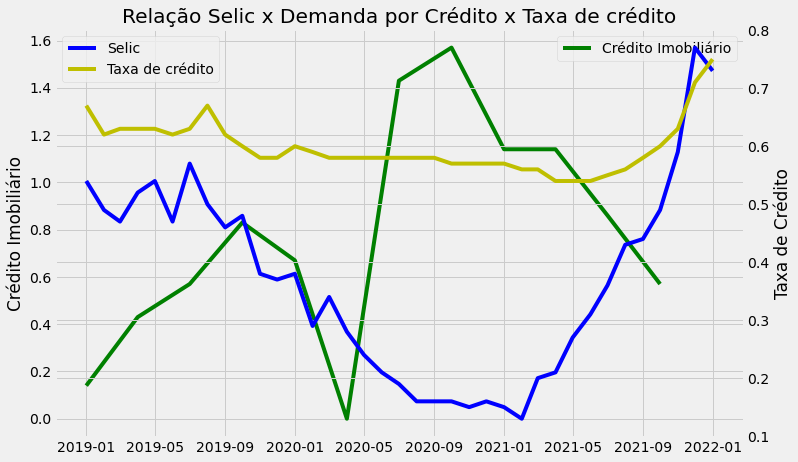

In [37]:
#pilotando o gráfico com as 3 variáveis

import matplotlib.pyplot as plt

#Definimos o tamanho do gráfico:
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')


fig, ax1 = plt.subplots()


#dando nome as variáveis x e y, através da nova base de dados que criamos
imobiliario_datas_2020 = demanda_imobiliario_2020['Joined_date']
imobiliario_valores_2020 = demanda_imobiliario_2020['valor']


#ax1
ax1.plot(imobiliario_datas_2020, imobiliario_valores_2020, color = 'g', label = 'Crédito Imobiliário')
ax1.set_ylabel('Crédito Imobiliário')  

                                                         
ax2 = ax1.twinx() 
                                                         
                                                         
#dando nome as variáveis x e y, através da nova base de dados que criamos
selic_datas_2020 = selic_2020['Joined_date']
selic_valores_2020 = selic_2020['valor']

taxa_credito_valores_2020 = taxa_credito_2020['Joined_date']
taxa_credito_datas_2020 = taxa_credito_2020['valor']

#ax2
ax2.plot(selic_datas_2020, selic_valores_2020, color = 'b', label = 'Selic')
ax2.plot(taxa_credito_valores_2020, taxa_credito_datas_2020, color = 'y', label = 'Taxa de crédito' )
ax2.set_ylabel('Selic')
ax2.set_ylabel('Taxa de Crédito')
                                                                                        

#definindo título,
plt.title('Relação Selic x Demanda por Crédito x Taxa de crédito')

ax1.legend(loc=0) 
ax2.legend(loc=7)

plt.legend()
plt.show()



A relação entre Selic e crédito imobiliário fica realmente nítida entre o período de Set/2020 - Jan/2021. Claro que a Selic não foi o único fator que impulsionou o crédito, mas com certeza foi um dos principais. 

Entretanto, durante a pandemia, nós tivemos um momento extraordinário onde a base monetária brasileira se expandiu e aliada ao auxílio emergencial, FGTS emergencial e o lançamento da nota de 200 reais, aumentou os meios de pagamento, de modo a deixar as pessoas relativamente mais confortáveis com a situação econômica do período. Isso atrelado a queda nas taxas de juros, principalmente da Selic, que bateu a sua mínima histórica em 2020, revelou um momento propício para a tomada de crédito pelas famílias e o fornecimento de crédito pelas instituições financeiras (as quais estavam tentando manter seu negócio estável durante a pandemia). 


# Selic x Inflação

In [64]:
#433	Índice nacional de preços ao consumidor-amplo (IPCA)

IPCA_import = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json'
IPCA = pd.read_json(IPCA_import)

#Definindo o período das datas

IPCA_datas = IPCA['data']
IPCA_valor = IPCA['valor']

IPCA_per_data = pd.DataFrame({'Joined_date': pd.to_datetime(IPCA_datas, format = '%d/%m/%Y'),"valor":IPCA_valor})

IPCA_2020 = IPCA_per_data.query("Joined_date >= '2019-01-01' and Joined_date <='2022-01-01'")

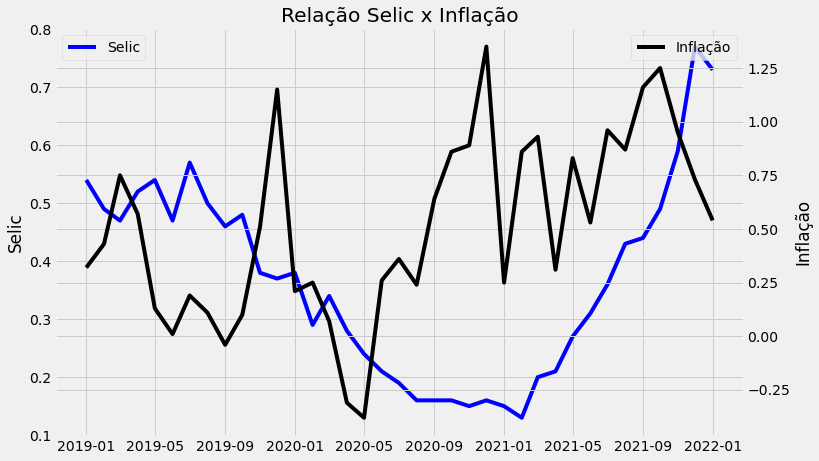

In [76]:
#pilotando o gráfico com as 3 variáveis

#Definimos o tamanho do gráfico:
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots()


#Definindo IPCA
IPCA_valores_2020 = IPCA_2020['valor']
IPCA_datas_2020 = IPCA_2020['Joined_date']

#plotando os gráficos
ax1.plot(IPCA_datas_2020, selic_valores_2020, color = 'blue', label = 'Selic')
ax1.set_ylabel('Selic')

ax2 = ax1.twinx()
ax2.plot(IPCA_datas_2020, IPCA_valores_2020, color = 'black', label = 'Inflação')
ax2.set_ylabel('Inflação')

                                                                                                                                                                                    
#definindo título,
plt.title('Relação Selic x Inflação')

ax1.legend(loc=0) 
ax2.legend(loc=0)

plt.legend()
plt.show()


# Explicando em maiores detalhes: O que acontece quando a Inflação sobe?

# Inadimplência


Portanto, vejamos abaixo como o aumento da Selic ao longo dos últimos meses afetou o índice de inadimplência principal para analisar a ação das famílias:


[]

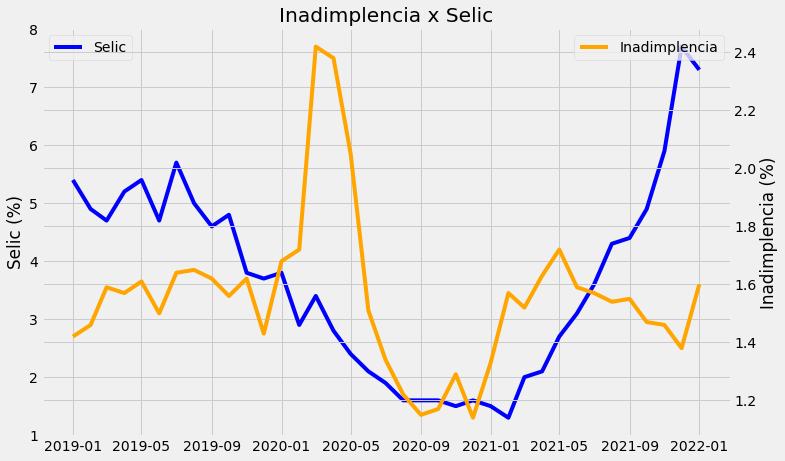

In [44]:
#21151	Inadimplência da carteira - Pessoas físicas - Financiamento imobiliário total

inadimplencia_import = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.21151/dados?formato=json'
inadimplencia = pd.read_json(inadimplencia_import)

inadimplencia_datas = inadimplencia['data'] 
inadimplencia_valores = inadimplencia['valor']

inadimplencia_per_data = pd.DataFrame({'Joined_date': pd.to_datetime(inadimplencia_datas , format = '%d/%m/%Y'),"valor":inadimplencia_valores})
inadimplencia_2020 = inadimplencia_per_data.query("Joined_date >= '2019-01-01' and Joined_date <='2022-01-01'")

#Definimos o tamanho do gráfico:
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')


fig, ax1 = plt.subplots()


inadimplencia_2020_datas = inadimplencia_2020['Joined_date']
inadimplencia_2020_valores = inadimplencia_2020['valor']

ax1.plot(inadimplencia_2020_datas, (selic_valores_2020 *10), color = 'blue', label = 'Selic')
ax1.set_ylabel('Selic (%)')


ax2 = ax1.twinx()


ax2.plot(inadimplencia_2020_datas, inadimplencia_2020_valores, color = 'orange', label = 'Inadimplencia')
ax2.set_ylabel('Inadimplencia (%)')
plt.title('Inadimplencia x Selic')

ax1.legend(loc=2) 
ax2.legend(loc=0)

plt.legend()
plt.plot()



Curioso observar como a Inadimplência subiu muito durante o início da pandemia, já que um evento extraordinário como o COVID-19 fez com que a população tivesse incertezas sobre o futuro e preferisse guardar dinheiro ao invés de gastar, ou até mesmo pagar as próprias dívidas, efeito o qual trazemos o nome de entesouramento. Já para os períodos seguintes podemos observar uma queda drástica da inadimplência, atrelado a queda da Selic, barateamento do crédito e a tentativa dos bancos em renegociar os valores. 


# Conclusão


Em suma, o objetivo fim do artigo era chegar a esta análise do comportamento da inadimplência em relação as variações da Selic. A partir disso, é possível observar que, com o aumento da Selic, a partir de 2021, houve um aumento da inadimplência, que atualmente se encontra alta em relação ao período em que a Selic bateu sua mínima histórica. Isso pode ser um reflexo não somente do aumento da Selic, mas também da inflação e a perda do poder de compra do consumidor, pois devemos lembrar que ainda nos encontramos em uma economia fragilizada pela pandemia, onde as famílias buscam recuperar sua fonte de renda para períodos anteriores à tragédia. 
